# Tomato Disease Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/PlantVillageTomatoSplited.zip


Streaming output truncated to the last 5000 lines.
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e624f89-d4ae-421b-9e9f-dcccd20211ac___YLCV_GCREC 5437.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e832665-08e7-4d77-9ab0-39a5fe3c919a___UF.GRC_YLCV_Lab 02473.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e83510e-18e7-4c6d-9223-3450766715c8___UF.GRC_YLCV_Lab 01939.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e891a18-662b-41d6-9bf3-a50eb7f58fbe___YLCV_NREC 0231.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e924491-cb5f-4843-8f26-de597f552240___YLCV_NREC 2011.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e95f4dc-6fa2-4fbb-a8b3-426e43f95d69___UF.GRC_YLCV_Lab 03118.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLea

### Import all the Dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


### Import data into tensorflow dataset object

In [ ]:
IMAGE_SIZE = 256
CHANNELS = 3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/PlantVillageTomatoSplited/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 11203 images belonging to 10 classes.


In [ ]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.62339157 0.5841759  0.5802543 ]
  [0.526076   0.48686036 0.4829388 ]
  [0.5357529  0.49653718 0.4926156 ]
  ...
  [0.4308059  0.37590393 0.37590393]
  [0.43179083 0.37688884 0.37688884]
  [0.43277577 0.37787378 0.37787378]]

 [[0.62257075 0.58335507 0.5794335 ]
  [0.52935916 0.49014348 0.4862219 ]
  [0.53402925 0.49481353 0.49089196]
  ...
  [0.44705886 0.3921569  0.3921569 ]
  [0.44705886 0.3921569  0.3921569 ]
  [0.44705886 0.3921569  0.3921569 ]]

 [[0.62175006 0.5825344  0.5786128 ]
  [0.5326423  0.4934266  0.48950502]
  [0.5323056  0.4930899  0.48916835]
  ...
  [0.4239699  0.36906794 0.36906794]
  [0.4232312  0.36832923 0.36832923]
  [0.4224925  0.36759055 0.36759055]]

 ...

 [[0.4971218  0.4735924  0.48143554]
  [0.5005691  0.47703966 0.48488283]
  [0.50401634 0.48048693 0.48833007]
  ...
  [0.46875694 0.42954126 0.43346283]
  [0.48134324 0.44212753 0.4460491 ]
  [0.4288054  0.38958973 0.3935113 ]]

 [[0.573649   0.5501196  0.5579627 ]
  [0.5710225  0.5474931  0.55533624]


In [ ]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/PlantVillageTomatoSplited/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 3198 images belonging to 10 classes.


In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/PlantVillageTomatoSplited/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1610 images belonging to 10 classes.


In [ ]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.48235297 0.4901961  0.47058827]
  [0.47882992 0.48667306 0.46706522]
  [0.47103265 0.4788758  0.45926794]
  ...
  [0.64273846 0.6623463  0.64666003]
  [0.64666003 0.6662679  0.6505816 ]
  [0.64705884 0.6666667  0.6509804 ]]

 [[0.48155525 0.4893984  0.46979055]
  [0.47767952 0.48552266 0.46591482]
  [0.46667513 0.47451827 0.45491043]
  ...
  [0.635683   0.65529084 0.63960457]
  [0.6396108  0.65921867 0.6435324 ]
  [0.6431803  0.66278815 0.6471019 ]]

 [[0.47530752 0.48315066 0.46354282]
  [0.4682427  0.47608584 0.456478  ]
  [0.45721734 0.46506047 0.44545263]
  ...
  [0.62784296 0.6474508  0.63176453]
  [0.6317708  0.65137863 0.63569236]
  [0.6356986  0.65530646 0.6396202 ]]

 ...

 [[0.28234702 0.28234702 0.25097448]
  [0.28627172 0.28627172 0.25489917]
  [0.290589   0.290589   0.25921646]
  ...
  [0.5190601  0.5151385  0.49945223]
  [0.5210938  0.5171722  0.5014859 ]
  [0.52037215 0.5164506  0.50076425]]

 [[0.27882713 0.27882713 0.24745457]
  [0.28274867 0.28274867 0.25137612]


## Building the Model

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (5,5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (5,5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (9,9), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((1, 1)),
    layers.Conv2D(64, (7, 7), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
11203/32

350.09375

In [ ]:
3198/32

99.9375

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=350,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=99,
    verbose=1,
    epochs=20,
)

Epoch 1/20
350/350 [==============================] - 219s 594ms/step - loss: 1.7110 - accuracy: 0.3958 - val_loss: 1.2751 - val_accuracy: 0.5540
Epoch 2/20
350/350 [==============================] - 204s 583ms/step - loss: 1.1775 - accuracy: 0.5988 - val_loss: 1.0945 - val_accuracy: 0.6067
Epoch 3/20
350/350 [==============================] - 203s 580ms/step - loss: 0.8822 - accuracy: 0.6929 - val_loss: 0.8284 - val_accuracy: 0.7105
Epoch 4/20
350/350 [==============================] - 202s 576ms/step - loss: 0.7146 - accuracy: 0.7553 - val_loss: 0.7568 - val_accuracy: 0.7330
Epoch 5/20
350/350 [==============================] - 201s 575ms/step - loss: 0.6111 - accuracy: 0.7878 - val_loss: 0.5619 - val_accuracy: 0.8065
Epoch 6/20
350/350 [==============================] - 202s 576ms/step - loss: 0.5466 - accuracy: 0.8084 - val_loss: 0.5269 - val_accuracy: 0.8112
Epoch 7/20
350/350 [==============================] - 202s 576ms/step - loss: 0.4806 - accuracy: 0.8315 - val_loss: 0.4608 -

In [ ]:
scores = model.evaluate(test_generator)

51/51 [==============================] - 22s 431ms/step - loss: 0.2174 - accuracy: 0.9280


In [ ]:
scores

[0.2173704206943512, 0.9279503226280212]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

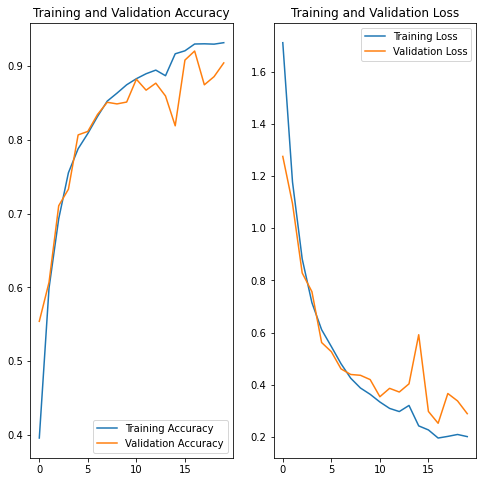

In [ ]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Tomato_Early_blight
1/1 [==============================] - 0s 145ms/step
predicted label: Tomato_Early_blight


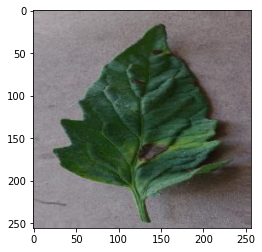

In [ ]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 16ms/step


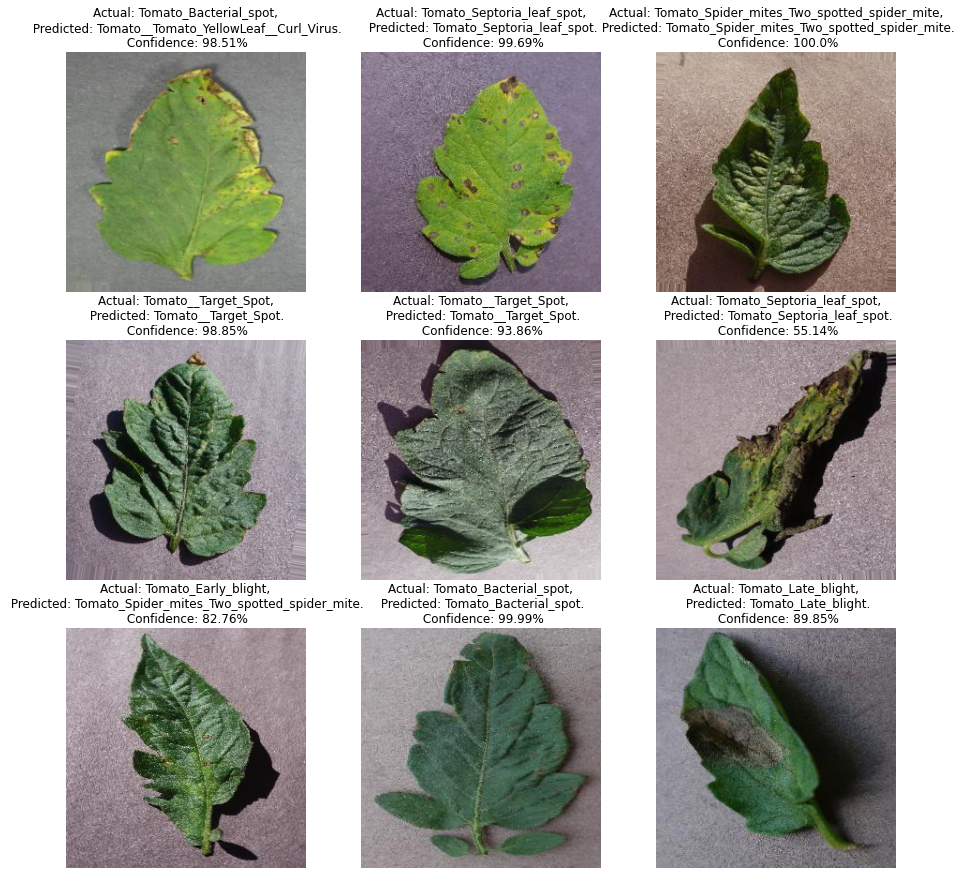

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [ ]:
model.save("potatoes.h5")

In [ ]:
from tensorflow.keras.models import load_model

# load model
model = load_model('potatoes.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        331840    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


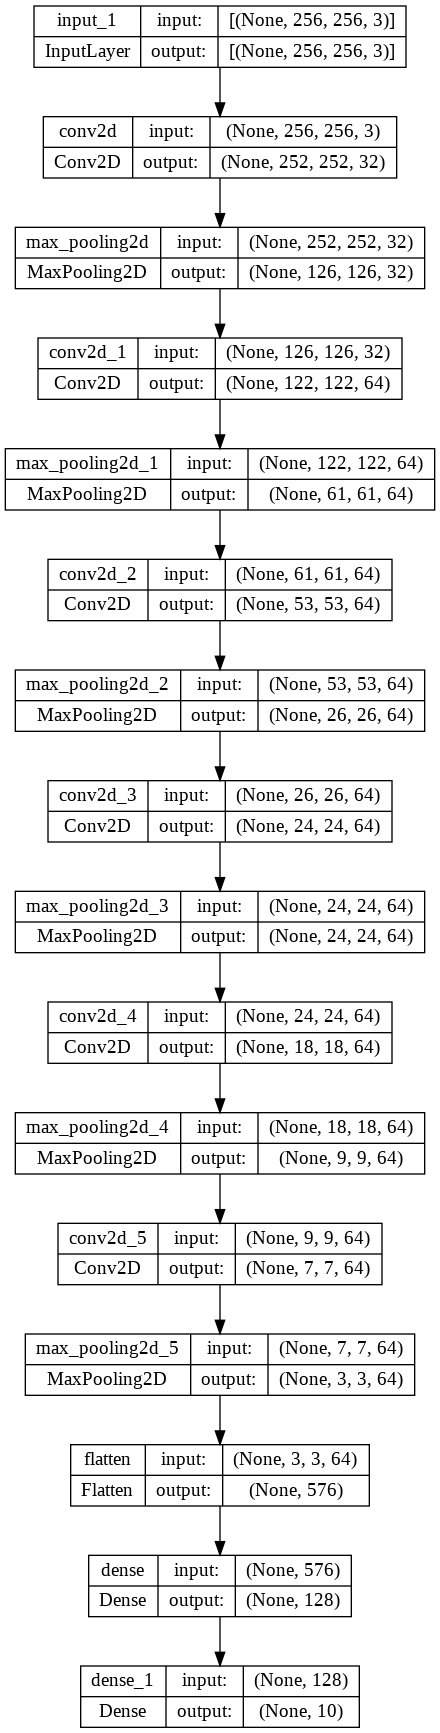

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 16.9 MB/s eta 0:00:00


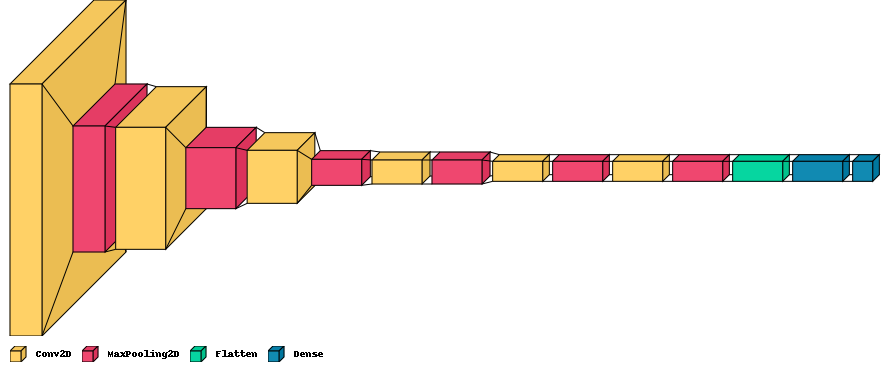

In [ ]:
import visualkeras
visualkeras.layered_view(model,legend=True,scale_xy=1, scale_z=1,max_z=50 )
